# 8 steps of Machine Learning
1. Data gathering
2. data preprocessing
3. Exploratory Data Analysis (EDA)
4. Feature engineering/selection
5. Training model
6. Test model/Model evaluation
7. Hyper Parameter tuning
8. Prediction

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1. Data gathering

In [3]:
data=pd.read_csv('FuelConsumption.csv')
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Check the basic info and missing values

In [3]:
data.shape

(1067, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [5]:
data.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [6]:
# Return DataFrame with duplicate rows removed.
data.drop_duplicates(inplace=True)

In [4]:
# count categorical unique value from make column
data['MAKE'].value_counts()
data.MAKE.value_counts()

FORD             90
CHEVROLET        86
BMW              64
MERCEDES-BENZ    59
GMC              49
AUDI             49
TOYOTA           49
PORSCHE          44
VOLKSWAGEN       42
DODGE            39
MINI             36
NISSAN           33
KIA              33
CADILLAC         32
JEEP             31
MAZDA            27
HYUNDAI          24
SUBARU           23
JAGUAR           22
LEXUS            22
HONDA            21
INFINITI         21
CHRYSLER         19
LAND ROVER       19
MITSUBISHI       16
BUICK            16
RAM              13
ACURA            12
VOLVO            11
LINCOLN          11
FIAT             10
SCION             9
BENTLEY           8
ROLLS-ROYCE       7
ASTON MARTIN      7
MASERATI          6
LAMBORGHINI       3
SMART             2
SRT               2
Name: MAKE, dtype: int64

In [8]:
# count categorical unique value from MODEL column
data['MODEL'].value_counts()

F150 FFV                 8
F150 FFV 4X4             8
ACCORD                   6
FOCUS FFV                6
BEETLE                   6
                        ..
Q50 AWD                  1
Q50                      1
SONATA HYBRID LIMITED    1
SONATA HYBRID            1
XC90 AWD                 1
Name: MODEL, Length: 663, dtype: int64

In [9]:
# count categorical unique value from VEHICLECLASS column
data['VEHICLECLASS'].value_counts()

MID-SIZE                    178
COMPACT                     172
SUV - SMALL                 154
SUV - STANDARD              110
FULL-SIZE                    86
TWO-SEATER                   71
SUBCOMPACT                   65
PICKUP TRUCK - STANDARD      62
MINICOMPACT                  47
STATION WAGON - SMALL        36
VAN - PASSENGER              25
VAN - CARGO                  22
MINIVAN                      14
PICKUP TRUCK - SMALL         12
SPECIAL PURPOSE VEHICLE       7
STATION WAGON - MID-SIZE      6
Name: VEHICLECLASS, dtype: int64

In [10]:
# count categorical unique value from TRANSMISSION  column
data['TRANSMISSION'].value_counts()

A6     222
AS6    189
M6     141
A8      87
AS8     80
AS7     76
M5      48
AV      46
A4      45
AM7     34
A5      30
A7      12
AV6     11
AS5     10
M7       9
A9       8
AM6      6
AV7      5
AV8      3
AS9      2
AM5      2
AS4      1
Name: TRANSMISSION, dtype: int64

In [11]:
data['FUELTYPE'].unique() # getting the name of unique value

array(['Z', 'D', 'X', 'E'], dtype=object)

In [12]:
# count categorical unique value from FUELTYPE  column
data['FUELTYPE'].value_counts()

X    514
Z    434
E     92
D     27
Name: FUELTYPE, dtype: int64

In [13]:
data['MODELYEAR'].value_counts()

2014    1067
Name: MODELYEAR, dtype: int64

In [14]:
# drop MODELYEAR COLUMN
data.drop(columns=['MODELYEAR'], inplace=True)

Statistical Analysis

In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ENGINESIZE,1067.0,3.346298,1.415895,1.0,2.00,3.4,4.30,8.4
CYLINDERS,1067.0,5.794752,1.797447,3.0,4.00,6.0,8.00,12.0
FUELCONSUMPTION_CITY,1067.0,13.296532,4.101253,4.6,10.25,12.6,15.55,30.2
FUELCONSUMPTION_HWY,1067.0,9.474602,2.794510,4.9,7.50,8.8,10.85,20.5
FUELCONSUMPTION_COMB,1067.0,11.580881,3.485595,4.7,9.00,10.9,13.35,25.8
FUELCONSUMPTION_COMB_MPG,1067.0,26.441425,7.468702,11.0,21.00,26.0,31.00,60.0
CO2EMISSIONS,1067.0,256.228679,63.372304,108.0,207.00,251.0,294.00,488.0


# 2. Data preprocessing

In [5]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [6]:
# each column transform categorical to numerical value and  update to dataframe
for col in ['MAKE','MODEL','VEHICLECLASS','TRANSMISSION','FUELTYPE']:
    data[col]=encoder.fit_transform(data[col]) 

In [7]:
data

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,0,329,0,2.0,4,10,3,9.9,6.7,8.5,33,196
1,2014,0,329,0,2.4,4,20,3,11.2,7.7,9.6,29,221
2,2014,0,330,0,1.5,4,17,3,6.0,5.8,5.9,48,136
3,2014,0,389,11,3.5,6,11,3,12.7,9.1,11.1,25,255
4,2014,0,483,11,3.5,6,11,3,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,38,624,11,3.0,6,11,2,13.4,9.8,11.8,24,271
1063,2014,38,624,11,3.2,6,11,2,13.2,9.5,11.5,25,264
1064,2014,38,625,11,3.0,6,11,2,13.4,9.8,11.8,24,271
1065,2014,38,625,11,3.2,6,11,2,12.9,9.3,11.3,25,260


# 3. EDA

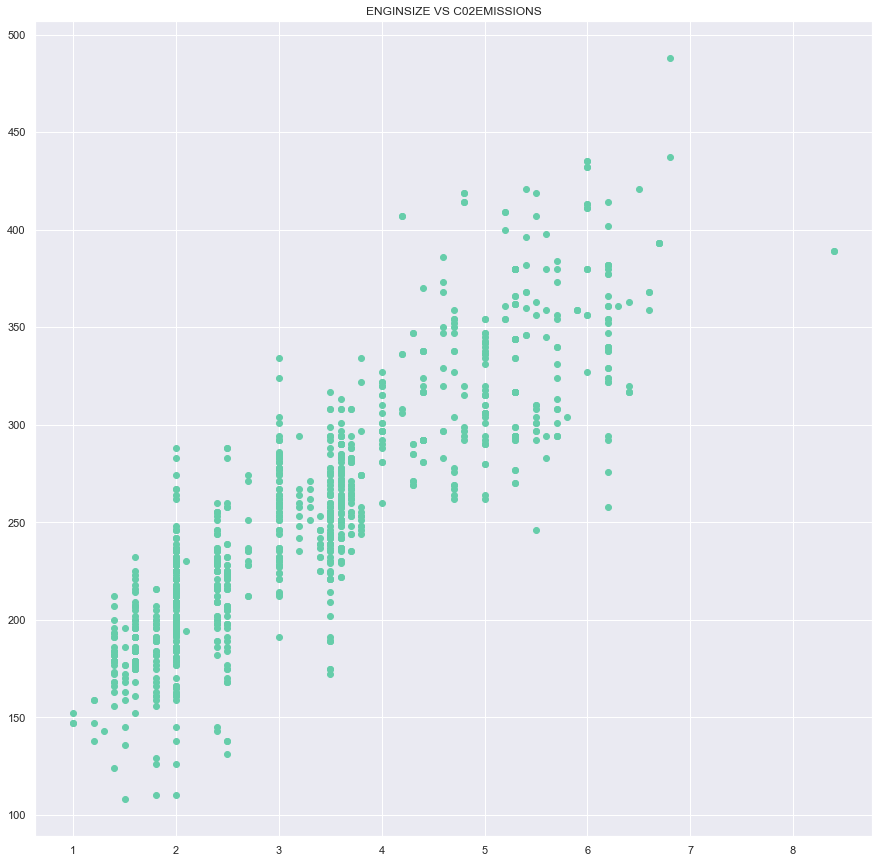

In [8]:
sns.set(style='dark')
plt.figure(figsize=(15,15))
plt.grid()
plt.scatter(x=data['ENGINESIZE'],y=data['CO2EMISSIONS'],color='MediumAquamarine')
plt.title('ENGINSIZE VS C02EMISSIONS')
plt.show()

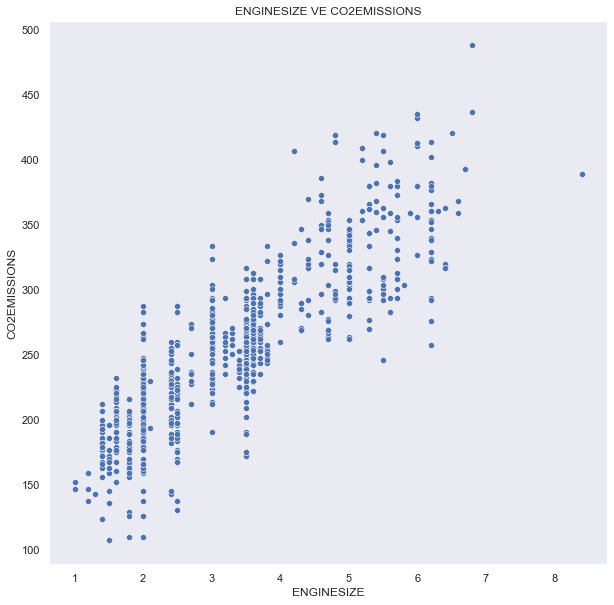

In [20]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='ENGINESIZE', y='CO2EMISSIONS', data=data)
plt.title('ENGINESIZE VE CO2EMISSIONS')
plt.show()

c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ENGINESIZE', ylabel='Frequency'>

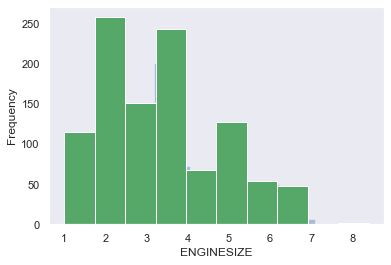

In [21]:
sns.distplot(data.ENGINESIZE,kde=False)
data['ENGINESIZE'].plot(kind='hist') # hist/bar
data.ENGINESIZE.plot(kind='hist') # by this plot we can know the distribution of data over x axis

<Figure size 720x720 with 0 Axes>

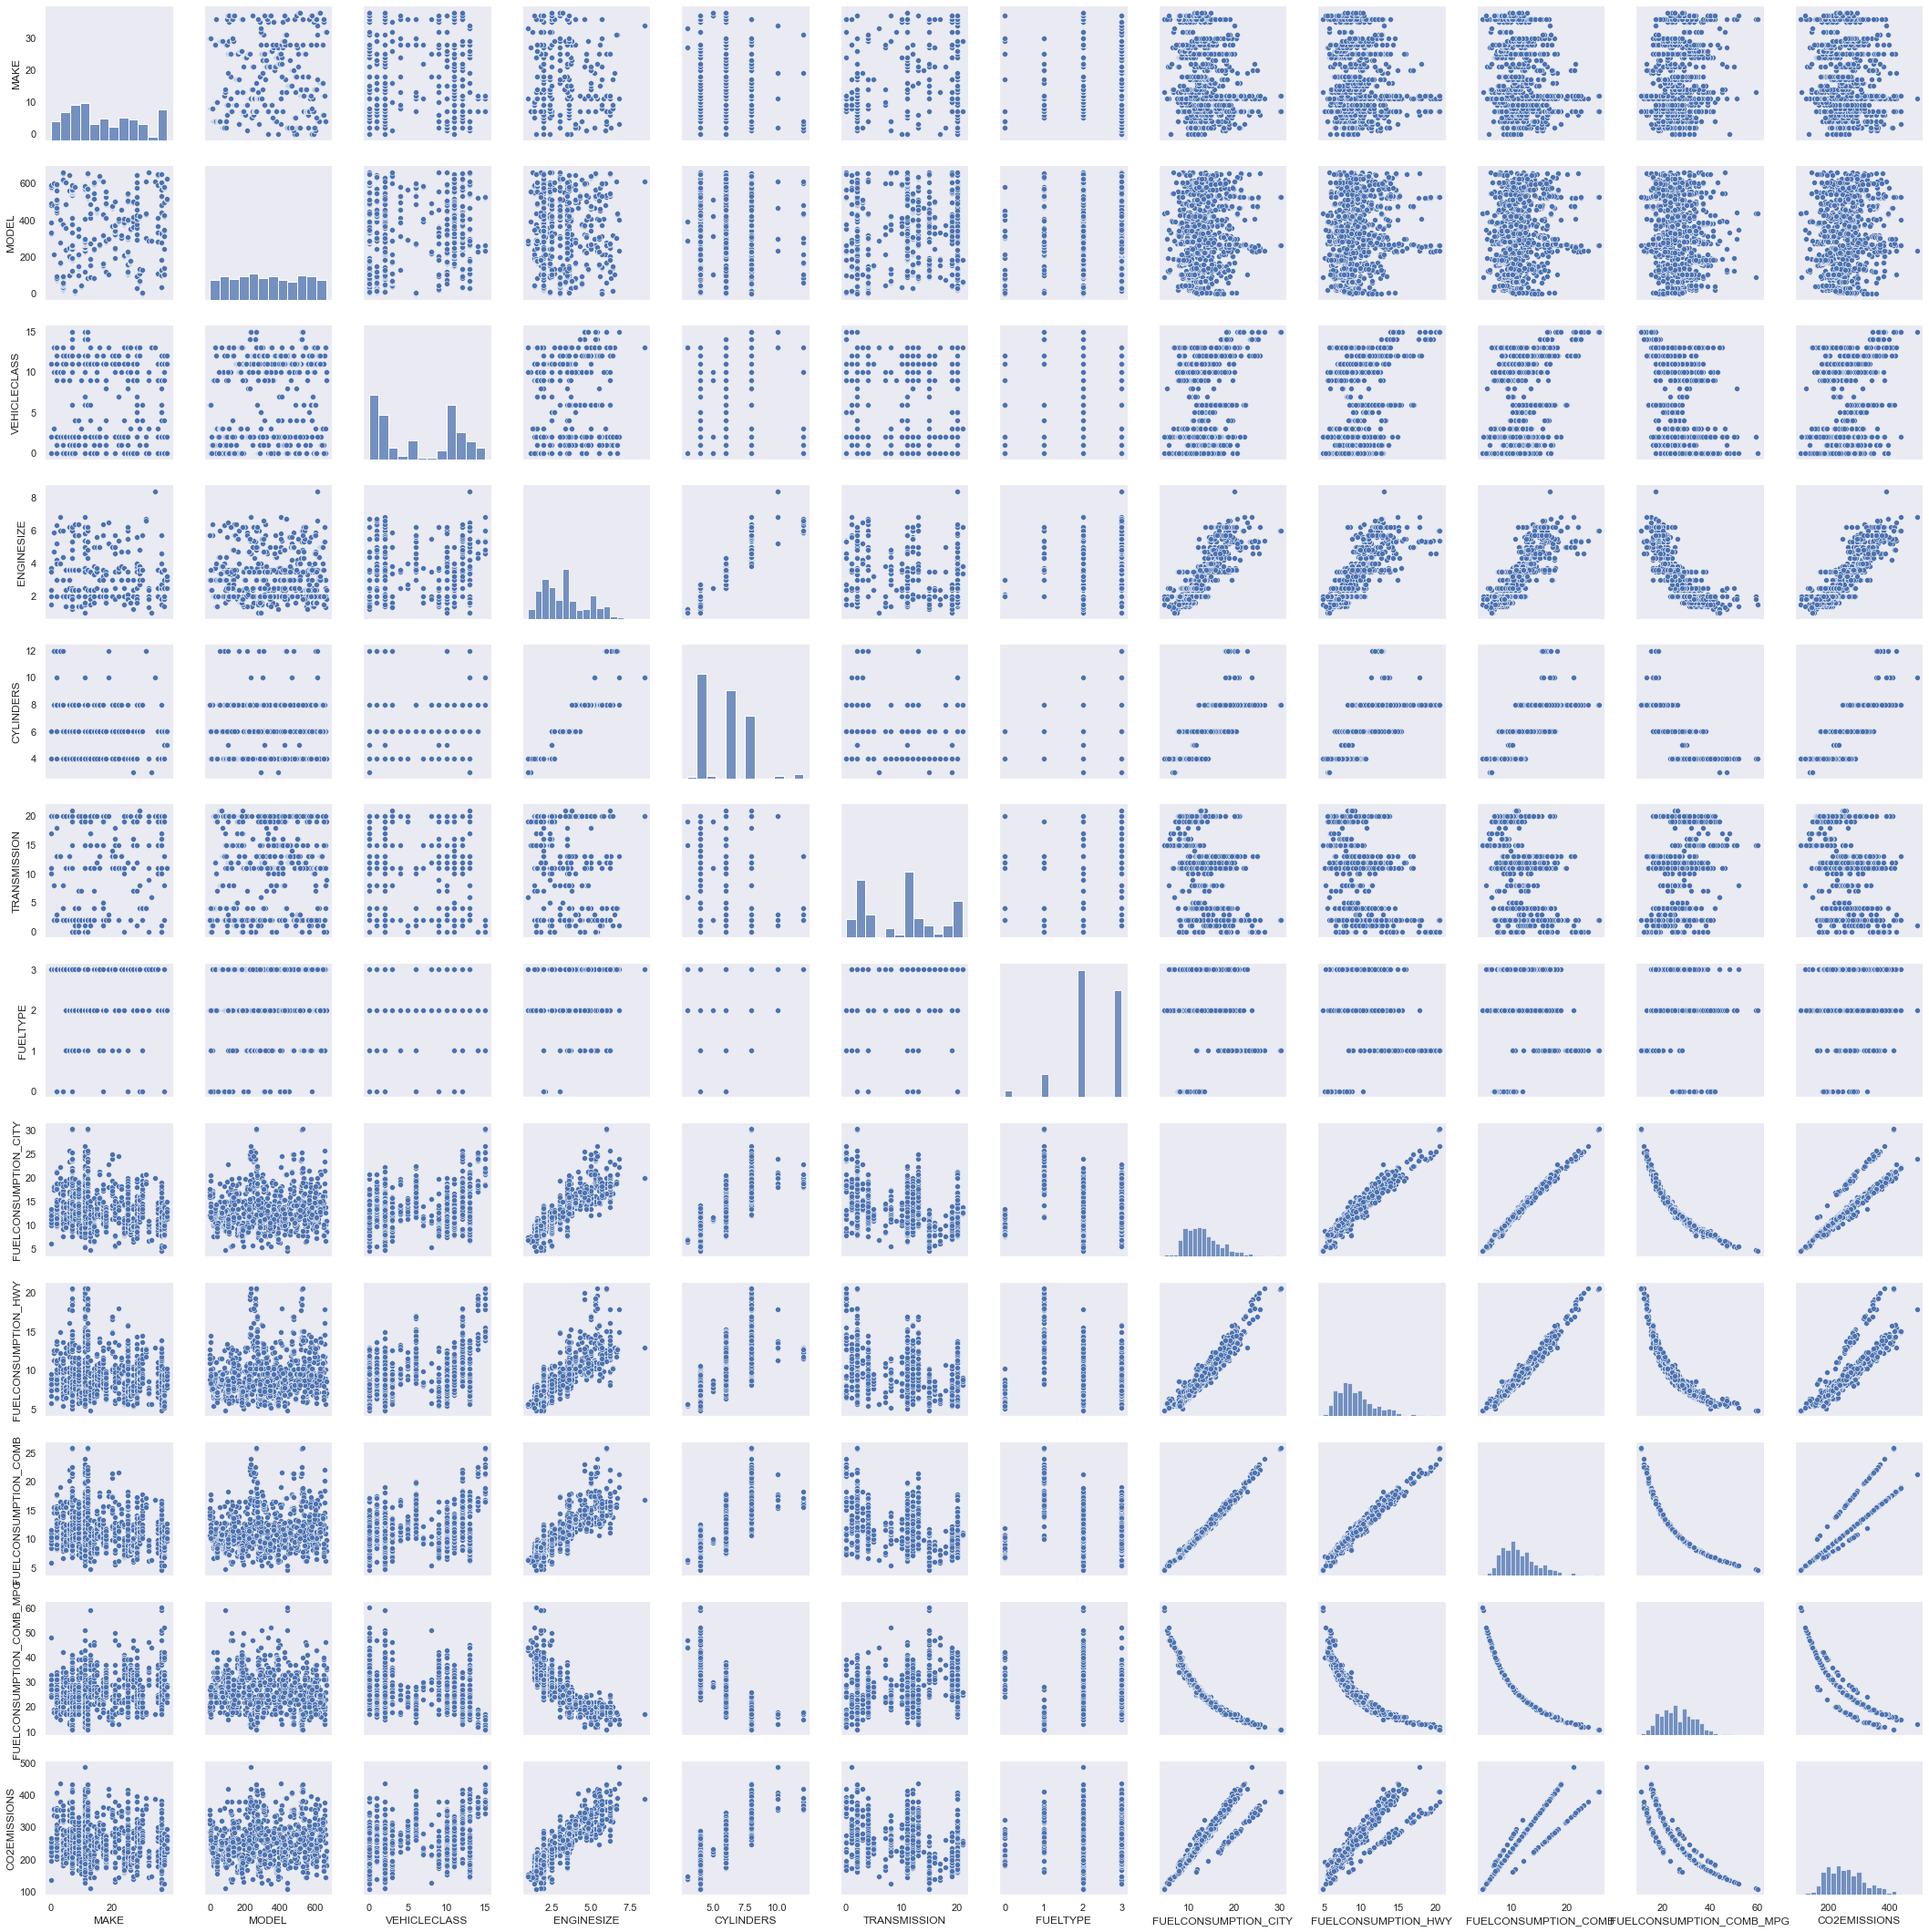

In [22]:
plt.figure(figsize=(10,10))
sns.pairplot(data=data)

<AxesSubplot:xlabel='ENGINESIZE'>

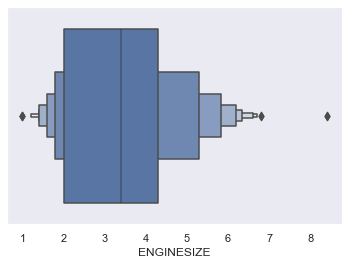

In [23]:
sns.boxenplot(data=data, x='ENGINESIZE', )

# 4. Feature Engineering/Selection

Finding important features

In [24]:
correlation=data.corr()
correlation

,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MAKE,1.000000,0.039068,0.005853,-0.166416,-0.203427,0.193264,0.015051,-0.246247,-0.174665,-0.222273,0.226347,-0.186504
MODEL,0.039068,1.000000,0.244648,0.096304,0.080010,-0.002004,-0.051902,0.147394,0.182009,0.161373,-0.148806,0.155492
VEHICLECLASS,0.005853,0.244648,1.000000,0.240529,0.208528,-0.172934,-0.083893,0.354363,0.430074,0.384678,-0.354073,0.388468
ENGINESIZE,-0.166416,0.096304,0.240529,1.000000,0.934011,-0.272427,0.060869,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,-0.203427,0.080010,0.208528,0.934011,1.000000,-0.246456,0.127959,0.796473,0.724594,0.776788,-0.770430,0.849685
TRANSMISSION,0.193264,-0.002004,-0.172934,-0.272427,-0.246456,1.000000,0.214650,-0.350241,-0.348174,-0.352596,0.341119,-0.299393
FUELTYPE,0.015051,-0.051902,-0.083893,0.060869,0.127959,0.214650,1.000000,-0.128841,-0.178439,-0.148167,0.007106,0.075167
FUELCONSUMPTION_CITY,-0.246247,0.147394,0.354363,0.832225,0.796473,-0.350241,-0.128841,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,-0.174665,0.182009,0.430074,0.778746,0.724594,-0.348174,-0.178439,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,-0.222273,0.161373,0.384678,0.819482,0.776788,-0.352596,-0.148167,0.995542,0.985804,1.000000,-0.927965,0.892129


<AxesSubplot:>

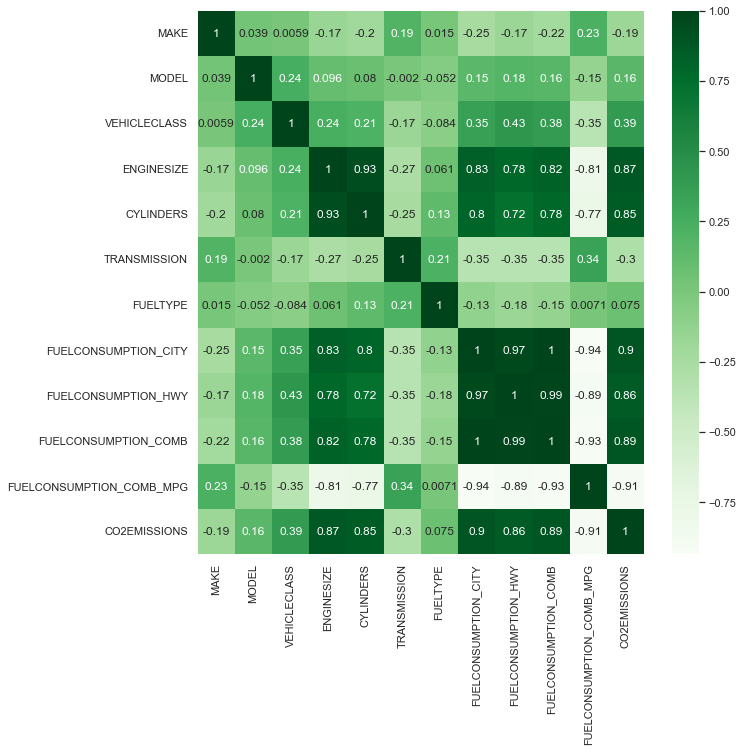

In [25]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot=True,cmap='Greens')

In [26]:
# Droping unnecessary ffeatures/column
data.drop(columns=['MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION',
          'FUELTYPE', 'FUELCONSUMPTION_COMB_MPG'], inplace=True)

<AxesSubplot:>

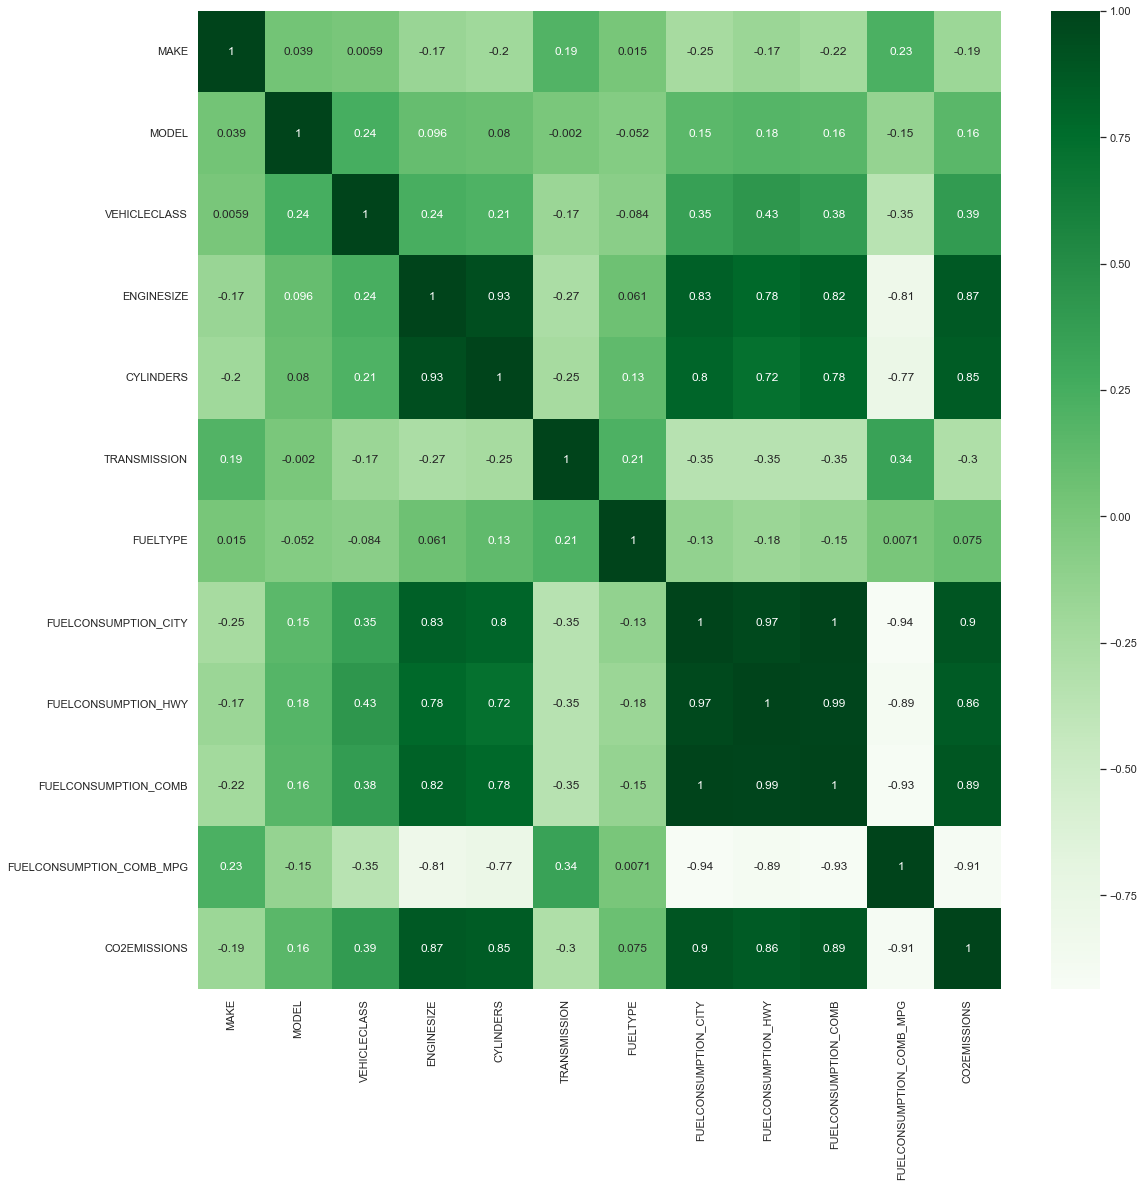

In [27]:
plt.figure(figsize=(18,18))
sns.heatmap(correlation, annot=True,cmap='Greens')

In [28]:
data

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
...,...,...,...,...,...,...
1062,3.0,6,13.4,9.8,11.8,271
1063,3.2,6,13.2,9.5,11.5,264
1064,3.0,6,13.4,9.8,11.8,271
1065,3.2,6,12.9,9.3,11.3,260


Detect Quartile and remove

In [9]:
Q1=np.percentile(data.ENGINESIZE, 25, method='midpoint')
Q1

2.0

In [10]:
Q3=np.percentile(data.ENGINESIZE, 75, method='midpoint')
Q3

4.3

In [11]:
iQR=Q3-Q1
iQR

2.3

In [12]:
Q3+1.5*iQR

7.75

In [13]:
Q1-1.5*iQR

-1.4499999999999997

In [14]:
Outliers_index_upper=np.where(data['ENGINESIZE']>Q3+1.5*iQR)
Outliers_index_upper[0]

array([940, 941], dtype=int64)

In [15]:
Outliers_index_lower=np.where(data['ENGINESIZE']<Q1-1.5*iQR)
Outliers_index_lower[0]

array([], dtype=int64)

In [16]:
# Droping Outliers_index
data.drop(Outliers_index_upper[0], inplace=True)

In [37]:
data

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
...,...,...,...,...,...,...
1062,3.0,6,13.4,9.8,11.8,271
1063,3.2,6,13.2,9.5,11.5,264
1064,3.0,6,13.4,9.8,11.8,271
1065,3.2,6,12.9,9.3,11.3,260


c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ENGINESIZE'>

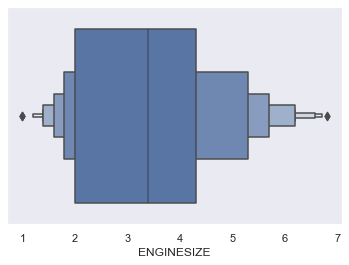

In [38]:
sns.boxenplot(data['ENGINESIZE'])

# 5. Training model

Train & test split

In [17]:
from sklearn.model_selection import train_test_split

When ues a single feature for modeling then we called simple linear Regression,
on the other hand when use one features for modeling then called multipul linear Regression

In [18]:
# simple linear rgression
train_features, test_features, train_target, test_target = train_test_split(
    data[['ENGINESIZE']], data[['CO2EMISSIONS']], test_size=0.2,random_state=2)


In [41]:
test_features

,ENGINESIZE
164,2.0
241,6.2
418,5.0
624,3.3
737,5.5
...,...
1066,3.2
470,5.3
272,1.4
226,4.8


In [42]:
test_features
test_target

,CO2EMISSIONS
164,232
241,324
418,264
624,271
737,301
...,...
1066,294
470,294
272,186
226,419


Modeling 

In [19]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [21]:
# training our model
model.fit(train_features,train_target)

LinearRegression()

In [45]:
# theta 0
model.intercept_ # intercept_ refers theta zero value, it will be always single value

array([123.95342108])

In [46]:
# theta 1
model.coef_ # coef_ means coefficient which refers theta one values , it may be multipul value

array([[39.32842296]])

In [47]:
test_target

,CO2EMISSIONS
164,232
241,324
418,264
624,271
737,301
...,...
1066,294
470,294
272,186
226,419


In [48]:
x=test_features.values[0] # return ENGINESIZE OF ZERO INDEX
yhat=model.intercept_ +(model.coef_*x) # mathematical calculation
yhat


array([[202.61026699]])

In [49]:
# return CO2EMISSION OF ZERO INDEX
test_target.values[0]   # .values[0]  conert Dataferm to numpy

array([232], dtype=int64)

# 6. Model testing and Evaluation

In [50]:
from sklearn.metrics import mean_squared_error, r2_score #sklearn.metrics contain all error evaluation module 

In [51]:
# mannuly Error calculations
y_hat=model.predict(test_features) # prediction
np.sum((test_target - y_hat)**2)/213


CO2EMISSIONS    846.110506
dtype: float64

In [52]:
# error calculation
mean_squared_error(test_target,y_hat) # similar with previous one

846.110505677681

In [53]:
# test accuricy
r2_score(test_target, y_hat) # or

r2_score(test_target, y_hat)*100

76.68018881543975

In [54]:
# Checking error and accurecy for single features
for features in data.columns[:-1]:
    print('__________')
    train_features, test_features, train_target, test_target = train_test_split(
    data[[features]], data[['CO2EMISSIONS']], test_size=0.2,random_state=2)

    model=LinearRegression()
    model.fit(train_features,train_target)
    y_hat=model.predict(test_features)
    print(f'ERROR OF {features}: ',mean_squared_error(test_target,y_hat))
    print(f'ACCURICY OF {features}: ',r2_score(test_target, y_hat)*100)

__________
ERROR OF ENGINESIZE:  846.110505677681
ACCURICY OF ENGINESIZE:  76.68018881543975
__________
ERROR OF CYLINDERS:  954.8360959338521
ACCURICY OF CYLINDERS:  73.68358232173708
__________
ERROR OF FUELCONSUMPTION_CITY:  837.9516984894432
ACCURICY OF FUELCONSUMPTION_CITY:  76.90505523873105
__________
ERROR OF FUELCONSUMPTION_HWY:  986.6445246410474
ACCURICY OF FUELCONSUMPTION_HWY:  72.80690422052946
__________
ERROR OF FUELCONSUMPTION_COMB:  847.3274857146505
ACCURICY OF FUELCONSUMPTION_COMB:  76.6466473991743


Multiple Linear Regression

In [55]:
from itertools import combinations # module of combinations

In [56]:
# Checking error and accurecy for combine features
feature_combinations = list(combinations(['ENGINESIZE', 'CYLINDERS','FUELCONSUMPTION_CITY',
                            'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB'], 3))  # 2 refers  numbers of combination
for features in feature_combinations:
    print('---------------')
    train_features, test_features, train_target, test_target = train_test_split(
        data[list(features)], data[['CO2EMISSIONS']], test_size=0.2,random_state=2)
    model=LinearRegression()
    model.fit(train_features,train_target)
    y_hat=model.predict(test_features)
    print(f'ERROR OF {features}: ',mean_squared_error(test_target,y_hat))
    print(f'ACCURICY OF {features}: ',r2_score(test_target, y_hat)*100)

---------------
ERROR OF ('ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY'):  574.6152509461183
ACCURICY OF ('ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY'):  84.16292072263103
---------------
ERROR OF ('ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_HWY'):  545.4206073593269
ACCURICY OF ('ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_HWY'):  84.96755979929539
---------------
ERROR OF ('ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB'):  551.941563624858
ACCURICY OF ('ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB'):  84.78783449410827
---------------
ERROR OF ('ENGINESIZE', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY'):  591.1818877213174
ACCURICY OF ('ENGINESIZE', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY'):  83.70632452276301
---------------
ERROR OF ('ENGINESIZE', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_COMB'):  590.8094980945527
ACCURICY OF ('ENGINESIZE', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_COMB'):  83.71658802348185
---------------
ERROR OF ('ENGINESIZE', 'FUELCONSUMPTION

# 7. Hyper Parameter tuning

Cross validation 

 k-fold Cross-Validation is a statistical method used to estimate the skill of machine learning models.

In [57]:
features=data.drop(columns=['CO2EMISSIONS','FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY'])
features

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB
0,2.0,4,8.5
1,2.4,4,9.6
2,1.5,4,5.9
3,3.5,6,11.1
4,3.5,6,10.6
...,...,...,...
1062,3.0,6,11.8
1063,3.2,6,11.5
1064,3.0,6,11.8
1065,3.2,6,11.3


In [58]:
target=data[['CO2EMISSIONS']]
target

,CO2EMISSIONS
0,196
1,221
2,136
3,255
4,244
...,...
1062,271
1063,264
1064,271
1065,260


In [59]:
from sklearn.model_selection import KFold # module of k-fold Cross-Validation

In [60]:
KFold? # return detail about dataset

SyntaxError: invalid syntax (2796840987.py, line 1)

In [ ]:
# this give us indexes of training and testing dataset and using these indexes we can find out values from original dataset
folds = KFold(n_splits=10) # define the number of splits
tuple(folds.split(features,target)) # split training and testing set


((array([ 107,  108,  109,  110,  111,  112,  113,  114,  115,  116,  117,
          118,  119,  120,  121,  122,  123,  124,  125,  126,  127,  128,
          129,  130,  131,  132,  133,  134,  135,  136,  137,  138,  139,
          140,  141,  142,  143,  144,  145,  146,  147,  148,  149,  150,
          151,  152,  153,  154,  155,  156,  157,  158,  159,  160,  161,
          162,  163,  164,  165,  166,  167,  168,  169,  170,  171,  172,
          173,  174,  175,  176,  177,  178,  179,  180,  181,  182,  183,
          184,  185,  186,  187,  188,  189,  190,  191,  192,  193,  194,
          195,  196,  197,  198,  199,  200,  201,  202,  203,  204,  205,
          206,  207,  208,  209,  210,  211,  212,  213,  214,  215,  216,
          217,  218,  219,  220,  221,  222,  223,  224,  225,  226,  227,
          228,  229,  230,  231,  232,  233,  234,  235,  236,  237,  238,
          239,  240,  241,  242,  243,  244,  245,  246,  247,  248,  249,
          250,  251,  252

In [ ]:
# Checking error and accurecy all splits using k-fold Cross-Validation
scores=[]
for train_index,test_index in tuple(folds.split(features,target)):
    #fetch data
    xtrain=features.values[train_index]
    ytrain=target.values[train_index]
    xtest=features.values[test_index]
    ytest=target.values[test_index]

    # Model
    Model=LinearRegression()
    Model.fit(xtrain,ytrain)
    # Testing
    y_hat= Model.predict(xtest)
    print(f'Mean Squared Error: ',mean_squared_error(ytest,y_hat))
    print(f'R Square Error: ',r2_score(ytest, y_hat)*100)
    scores.append(r2_score(ytest, y_hat)*100)


Mean Squared Error:  349.1792914525303
R Square Error:  90.96058598041148
Mean Squared Error:  434.7012169215582
R Square Error:  85.37478166017146
Mean Squared Error:  1072.8174664588082
R Square Error:  75.47100803506828
Mean Squared Error:  910.8646152554504
R Square Error:  83.02470944678863
Mean Squared Error:  1016.3448485078856
R Square Error:  80.92419086345551
Mean Squared Error:  427.83358047957836
R Square Error:  82.89594436218545
Mean Squared Error:  462.3282805532256
R Square Error:  87.46612671769797
Mean Squared Error:  403.3304279608698
R Square Error:  89.61625125430008
Mean Squared Error:  301.6605592329414
R Square Error:  90.96293356181839
Mean Squared Error:  404.33529139633697
R Square Error:  86.32109144438134


In [ ]:
scores # return all  splits accurecy

In [ ]:
scores=np.array(scores) # Checking average accurecy
scores.mean()

85.30176233262786

In [ ]:
# Another away of cross validation
from sklearn.model_selection import cross_val_score
Mode1_1=LinearRegression()
cross_value=cross_val_score(Mode1_1,features,target, cv=10) # cv=10 means number of split 
cross_value*100

array([90.96058598, 85.37478166, 75.47100804, 83.02470945, 80.92419086,
       82.89594436, 87.46612672, 89.61625125, 90.96293356, 86.32109144])

In [ ]:
cross_value.mean()*100 # Checking average accurecy

85.30176233262785

In [ ]:
# Checking mean_squared_error
from sklearn.model_selection import cross_val_score
Mode1_1=LinearRegression()
cross_value_MSE=cross_val_score(Mode1_1,features,target, cv=10, scoring='neg_mean_squared_error') # cv=10 means number of split 
cross_value_MSE

array([ -349.17929145,  -434.70121692, -1072.81746646,  -910.86461526,
       -1016.34484851,  -427.83358048,  -462.32828055,  -403.33042796,
        -301.66055923,  -404.3352914 ])

In [ ]:
cross_value_MSE.mean()

-578.339557821919

# 8. Model Visualization

Visualize simple Linear Regression

In [69]:
Model_2=LinearRegression()
Model_2.fit(features[['ENGINESIZE']], target)

LinearRegression()

In [70]:
features.describe().T

,count,mean,std,min,25%,50%,75%,max
ENGINESIZE,1065.0,3.336808,1.400153,1.0,2.0,3.4,4.3,6.8
CYLINDERS,1065.0,5.786854,1.789857,3.0,4.0,6.0,8.0,12.0
FUELCONSUMPTION_COMB,1065.0,11.570892,3.481225,4.7,9.0,10.9,13.3,25.8


In [71]:
dummy_feature=np.linspace(1,7,200).reshape(-1,1) # reshape(-1,1) converting 1D to 2D array
dummy_feature
ypred=Model_2.predict(dummy_feature) 
ypred

c:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[163.81439263],
       [165.00355464],
       [166.19271665],
       [167.38187866],
       [168.57104067],
       [169.76020268],
       [170.94936468],
       [172.13852669],
       [173.3276887 ],
       [174.51685071],
       [175.70601272],
       [176.89517473],
       [178.08433674],
       [179.27349875],
       [180.46266076],
       [181.65182277],
       [182.84098478],
       [184.03014679],
       [185.2193088 ],
       [186.40847081],
       [187.59763282],
       [188.78679483],
       [189.97595684],
       [191.16511885],
       [192.35428086],
       [193.54344287],
       [194.73260487],
       [195.92176688],
       [197.11092889],
       [198.3000909 ],
       [199.48925291],
       [200.67841492],
       [201.86757693],
       [203.05673894],
       [204.24590095],
       [205.43506296],
       [206.62422497],
       [207.81338698],
       [209.00254899],
       [210.191711  ],
       [211.38087301],
       [212.57003502],
       [213.75919703],
       [214

In [72]:
ypred.ravel()# ravel() converting 2D to 1D array

array([163.81439263, 165.00355464, 166.19271665, 167.38187866,
       168.57104067, 169.76020268, 170.94936468, 172.13852669,
       173.3276887 , 174.51685071, 175.70601272, 176.89517473,
       178.08433674, 179.27349875, 180.46266076, 181.65182277,
       182.84098478, 184.03014679, 185.2193088 , 186.40847081,
       187.59763282, 188.78679483, 189.97595684, 191.16511885,
       192.35428086, 193.54344287, 194.73260487, 195.92176688,
       197.11092889, 198.3000909 , 199.48925291, 200.67841492,
       201.86757693, 203.05673894, 204.24590095, 205.43506296,
       206.62422497, 207.81338698, 209.00254899, 210.191711  ,
       211.38087301, 212.57003502, 213.75919703, 214.94835904,
       216.13752105, 217.32668305, 218.51584506, 219.70500707,
       220.89416908, 222.08333109, 223.2724931 , 224.46165511,
       225.65081712, 226.83997913, 228.02914114, 229.21830315,
       230.40746516, 231.59662717, 232.78578918, 233.97495119,
       235.1641132 , 236.35327521, 237.54243722, 238.73

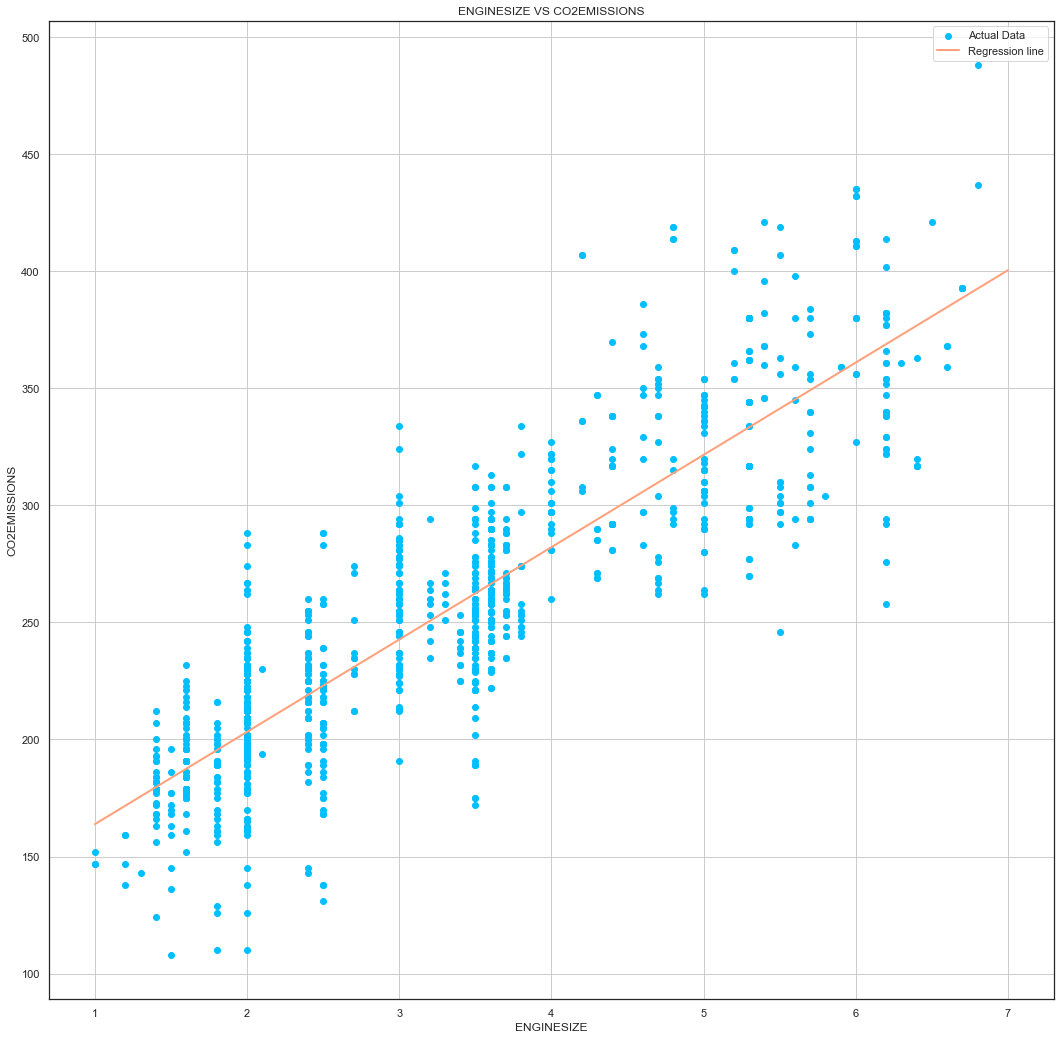

In [74]:
plt.figure(figsize=(18,18))
sns.set(style='white')
plt.scatter(features[['ENGINESIZE']],target, label='Actual Data',color='DeepSkyBlue')
plt.plot(dummy_feature.ravel(), ypred.ravel(), label='Regression line',color='LightSalmon',linewidth=2)
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.title('ENGINESIZE VS CO2EMISSIONS')
plt.grid()
plt.legend()
plt.show()


Visualize Multiple Linear Regression

In [75]:
Model_3=LinearRegression()
Model_3.fit(features[['ENGINESIZE','FUELCONSUMPTION_COMB']], target)

LinearRegression()

In [76]:
dummy_ENGINESIZE=np.linspace(1,5,200)
dummy_FUELCONSUMPTION_COMB=np.linspace(4.8,25.8,200)
dummy_features=np.c_[dummy_ENGINESIZE,dummy_FUELCONSUMPTION_COMB] # c_ means concatination
dummy_features

array([[ 1.        ,  4.8       ],
       [ 1.0201005 ,  4.90552764],
       [ 1.04020101,  5.01105528],
       [ 1.06030151,  5.11658291],
       [ 1.08040201,  5.22211055],
       [ 1.10050251,  5.32763819],
       [ 1.12060302,  5.43316583],
       [ 1.14070352,  5.53869347],
       [ 1.16080402,  5.64422111],
       [ 1.18090452,  5.74974874],
       [ 1.20100503,  5.85527638],
       [ 1.22110553,  5.96080402],
       [ 1.24120603,  6.06633166],
       [ 1.26130653,  6.1718593 ],
       [ 1.28140704,  6.27738693],
       [ 1.30150754,  6.38291457],
       [ 1.32160804,  6.48844221],
       [ 1.34170854,  6.59396985],
       [ 1.36180905,  6.69949749],
       [ 1.38190955,  6.80502513],
       [ 1.40201005,  6.91055276],
       [ 1.42211055,  7.0160804 ],
       [ 1.44221106,  7.12160804],
       [ 1.46231156,  7.22713568],
       [ 1.48241206,  7.33266332],
       [ 1.50251256,  7.43819095],
       [ 1.52261307,  7.54371859],
       [ 1.54271357,  7.64924623],
       [ 1.56281407,

In [77]:
ypred=Model_3.predict(dummy_features)
ypred

c:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[144.42455158],
       [145.84223613],
       [147.25992069],
       [148.67760525],
       [150.09528981],
       [151.51297437],
       [152.93065893],
       [154.34834349],
       [155.76602805],
       [157.18371261],
       [158.60139717],
       [160.01908173],
       [161.43676629],
       [162.85445084],
       [164.2721354 ],
       [165.68981996],
       [167.10750452],
       [168.52518908],
       [169.94287364],
       [171.3605582 ],
       [172.77824276],
       [174.19592732],
       [175.61361188],
       [177.03129644],
       [178.448981  ],
       [179.86666555],
       [181.28435011],
       [182.70203467],
       [184.11971923],
       [185.53740379],
       [186.95508835],
       [188.37277291],
       [189.79045747],
       [191.20814203],
       [192.62582659],
       [194.04351115],
       [195.46119571],
       [196.87888026],
       [198.29656482],
       [199.71424938],
       [201.13193394],
       [202.5496185 ],
       [203.96730306],
       [205

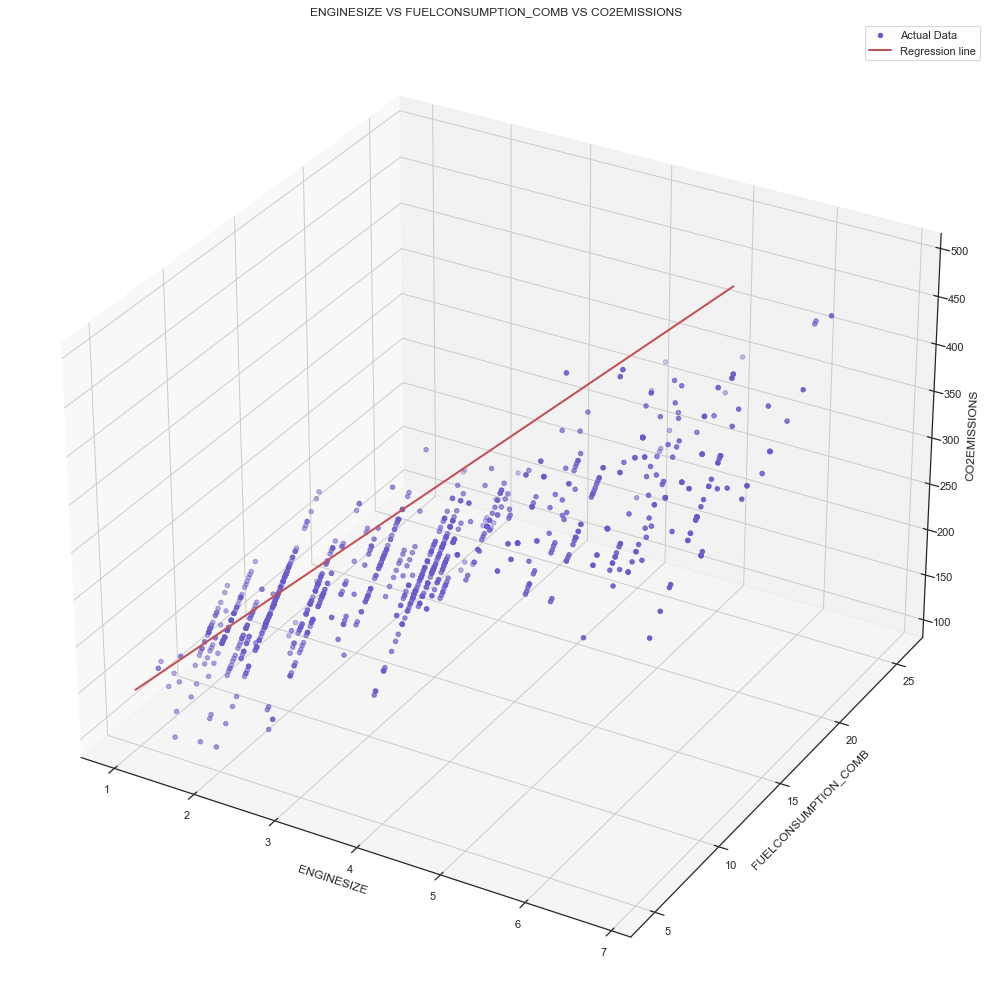

In [80]:
plt.figure(figsize=(18,18))
axes=plt.axes(projection='3d') # create 3d axes
axes.scatter3D(features['ENGINESIZE'],features['FUELCONSUMPTION_COMB'],target, label='Actual Data',color='SlateBlue')

axes.plot3D(dummy_ENGINESIZE,dummy_FUELCONSUMPTION_COMB, ypred.ravel(), label='Regression line',color='r',linewidth=2)
axes.set_xlabel('ENGINESIZE')
axes.set_ylabel('FUELCONSUMPTION_COMB')
axes.set_zlabel('CO2EMISSIONS')
plt.title('ENGINESIZE VS FUELCONSUMPTION_COMB VS CO2EMISSIONS')
plt.legend()
plt.show()

In [ ]:
data.columns

In [ ]:
data.describe().T